In [1]:
# import libraries
import pandas as pd
import numpy as np
import emoji
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
# Load the datasets
threads_df = pd.read_csv("Data/threads_reviews.csv")     
twitter_df = pd.read_csv("Data/twitter_2023-07.csv") 

### Looking at Threads dataset

In [5]:
# First 5 Threads
print(threads_df.head())

        source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43  


In [6]:
# Last 5 threads
print(threads_df.tail())

          source                                 review_description  rating  \
32905  App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906  App Store              Add Search and hashtag like Twitter !       1   
32907  App Store                                        bad twister       1   
32908  App Store                       Yet another trash from Meta.       1   
32909  App Store  Nothing special this app is just a copy of twi...       1   

               review_date  
32905  2023-07-06 01:23:55  
32906  2023-07-19 08:01:06  
32907  2023-07-17 06:39:13  
32908  2023-07-07 17:47:16  
32909  2023-07-07 07:01:43  


- threads dataset has few 'app_store' data points.
- to check how many 'app_store' and handle

### Looking at Twitter dataset

In [7]:
# First 5 Twitter
print(twitter_df.head())

   Unnamed: 0                             review_id       pseudo_author_id  \
0     1988084  f1584af1-3c91-4b7b-ade9-bd88c8d7a057  218447363838332529729   
1     1988085  3244b60a-8656-4fad-aaa6-7f199b6bf5bd  270227692644125640170   
2     1988086  f6aa48d3-e35a-454f-8eb2-b2605fbd5632  237950927094411183998   
3     1988087  00d82206-a895-432f-9761-baa3eb181749  153032963929626212115   
4     1988088  34a514ff-8f35-4e57-a667-18adfe416f25  174367592227204047784   

           author_name                                        review_text  \
0         Ay********an                                                 Ok   
1          Pr*******ai  App and website quality has consistently been ...   
2  St***************ch                          Great app; no complaints.   
3          A.*******ey                App crashes whenever I try to post.   
4        TA*********AT  Forced to download app cos I cant see tweets w...   

   review_rating  review_likes author_app_version     review_timesta

In [8]:
# Last 5 twitter
print(twitter_df.tail())

       Unnamed: 0                             review_id  \
34783     2022867  8eb3e09e-0269-4000-bf1d-bca068aab0d4   
34784     2022868  07147f9e-12e2-41e5-9909-9fd58833b9b1   
34785     2022869  2993c3c6-ae99-4b7a-922b-2f9ad4cc8fd1   
34786     2022870  4e199ee2-5d5a-4250-8d33-c616c9a425d3   
34787     2022871  3ef51c55-d534-45cb-847c-94a7f1fcc8a2   

            pseudo_author_id    author_name  \
34783  183174234511158497367  Av*********an   
34784  407012831597074592641             **   
34785  631000167645252964295       In****r8   
34786  291283487932051543175   Ro********er   
34787  148725782584965520105  Al*********ić   

                                             review_text  review_rating  \
34783                                 This app is a cyst              1   
34784  見つける機能廃止の代わりのハイライトの通信がやたら時間かかる。タイムラインも読み込みに時間か...              3   
34785                                        It's so bad              1   
34786  Horrible because Elon doesn't know how to do a...      

- the twitter dataset has many unwanted columns, should handle this
- it also has different language other tha english, should handle this

### Threads Info

In [9]:
# Info print for threads
print(threads_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB
None 



### Twitter Info

In [10]:
# Info print for twitter
print(twitter_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34788 entries, 0 to 34787
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          34788 non-null  int64 
 1   review_id           34788 non-null  object
 2   pseudo_author_id    34788 non-null  object
 3   author_name         34788 non-null  object
 4   review_text         34785 non-null  object
 5   review_rating       34788 non-null  int64 
 6   review_likes        34788 non-null  int64 
 7   author_app_version  27874 non-null  object
 8   review_timestamp    34788 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.4+ MB
None


In [11]:
# Columns for confirmation
print("Threads columns:", threads_df.columns.tolist())
print("Twitter columns:", twitter_df.columns.tolist())

Threads columns: ['source', 'review_description', 'rating', 'review_date']
Twitter columns: ['Unnamed: 0', 'review_id', 'pseudo_author_id', 'author_name', 'review_text', 'review_rating', 'review_likes', 'author_app_version', 'review_timestamp']


- We see Twitter has unwanted columns not required for our project

#### Missing values - Threads

In [12]:
# Missing Values of Threads
print("\nMissing values (Threads):\n", threads_df.isnull().sum())



Missing values (Threads):
 source                0
review_description    0
rating                0
review_date           0
dtype: int64


#### Missing Values - Twitter

In [13]:
# Missing Values of Twitter
print("\nMissing values (Twitter):\n", twitter_df.isnull().sum())


Missing values (Twitter):
 Unnamed: 0               0
review_id                0
pseudo_author_id         0
author_name              0
review_text              3
review_rating            0
review_likes             0
author_app_version    6914
review_timestamp         0
dtype: int64


- Twitter has missing values in 2 columns - should handle this

## Data cleaning for threads for now

In [12]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
custom_stopwords = set([
    "app", "apps", "application", "applications",
    "thread", "threads", "instagram", "twitter","experience", "im", "account"
])
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r"http\S+|www\S+", "", text) # removes url
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text) # removes special chars
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [w for w in tokens if w not in custom_stopwords]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)



In [13]:
# Apply cleaning
threads_clean  =  threads_df.copy()
threads_clean["review_cleaned"] = threads_clean["review_description"].apply(clean_text)


print("\n--- CLEANING CHECK: original vs cleaned ---")
for i in range(3):
    print("\nOriginal:", threads_clean.loc[i, "review_description"])
    print("Cleaned :", threads_clean.loc[i, "review_cleaned"])



--- CLEANING CHECK: original vs cleaned ---

Original: Meh. Not the greatest experience on a Chromebook. Seems to be customized for phones only. Opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. Judging from the fact that every other app I know of is resizeable, this seems like it was a conscious choice by the developers . Why you'd do something like this is beyond understanding and suggests a control freak approach. Not a great way to make a first impression.
Cleaned : meh greatest chromebook seems customized phone open little screen cant expand resize reason complete mystery judging fact every know resizeable seems like conscious choice developer youd something like beyond understanding suggests control freak approach great way make first impression

Original: Pretty good for a first launch!! Its easy to use and self-explanatory and I'd say the algorithm is good as well. It has great *potential* but a few things need improvemen

In [14]:
import nltk
from nltk.probability import FreqDist

# Make sure you have NLTK punkt tokenizer
nltk.download("punkt")

# Combine all reviews (or you can do per cluster)
all_words = " ".join(threads_clean["review_cleaned"]).split()  # or nltk.word_tokenize(text)
freq_dist = FreqDist(all_words)

# Top 20 words overall
print("Top 20 words overall:")
for word, freq in freq_dist.most_common(20):
    print(f"{word}: {freq}")


Top 20 words overall:
good: 4382
like: 3138
nice: 2264
dont: 1945
better: 1770
post: 1752
cant: 1729
people: 1570
see: 1545
need: 1455
use: 1403
follow: 1356
great: 1235
feature: 1188
please: 1137
want: 1091
new: 1047
best: 1031
one: 1015
love: 976


[nltk_data] Downloading package punkt to /Users/siri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
pip install pandas numpy scikit-learn vaderSentiment

Note: you may need to restart the kernel to use updated packages.


## SENTIMENT ANALYSIS : USING VADER + KNN

By applying KMeans clustering to the compound sentiment scores, we could segment reviews into three clusters. The centroids of these clusters inform the thresholds for classifying sentiment, allowing for more objective labeling than manual cutoff values.

In [36]:

# ----------- LOAD DATA --------------
df = threads_clean.copy()     # <-- your dataframe
# ------------------------------------


# ---------- VADER SCORES -----------
analyzer = SentimentIntensityAnalyzer()
df["compound"] = df["review_cleaned"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
compound_array = df["compound"].values.reshape(-1,1)
# ------------------------------------

# ----------- KMEANS 3 CLUSTERS -----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters = kmeans.fit_predict(compound_array)
df["cluster"] = clusters

# map centroids -> pos/neu/neg
centroids = kmeans.cluster_centers_.flatten()
order = np.argsort(centroids)
label_map = {order[0]: "negative", order[1]: "neutral", order[2]: "positive"}

df["sentiment"] = df["cluster"].map(label_map)
# ------------------------------------

print(df[["review_description","review_cleaned","compound","sentiment"]].head())


                                  review_description  \
0  Meh. Not the greatest experience on a Chromebo...   
1  Pretty good for a first launch!! Its easy to u...   
2  For a brand new app, it's very well optimized....   
3  Great app with a lot of potential! However, th...   
4  The app is good, but it needs a lot of functio...   

                                      review_cleaned  compound sentiment  
0  meh greatest chromebook seems customized phone...    0.8834  positive  
1  pretty good first launch easy use selfexplanat...    0.9893  positive  
2  brand new well optimized however missing quite...    0.8880  positive  
3  great lot potential however lot need fixed exa...    0.6343  positive  
4  good need lot functionality example searching ...    0.8176  positive  


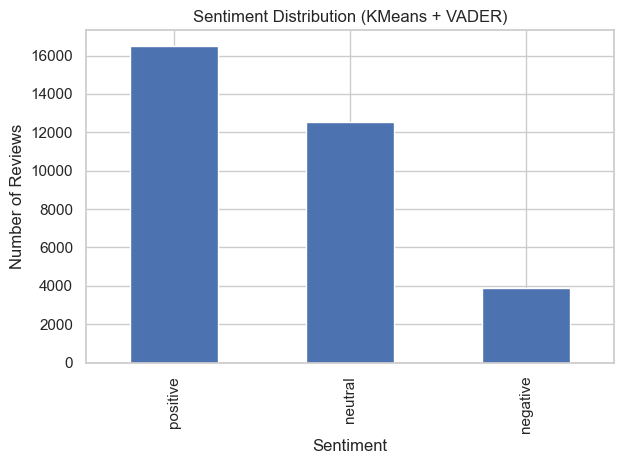

In [137]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar")

plt.title("Sentiment Distribution (KMeans + VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


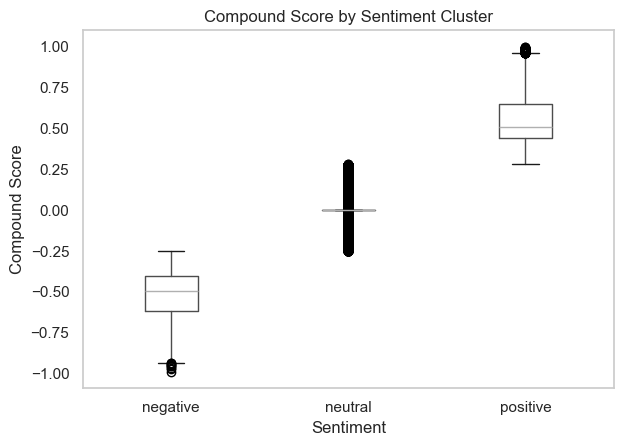

In [140]:
df.boxplot(column="compound", by="sentiment", grid=False)

plt.title("Compound Score by Sentiment Cluster")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Compound Score")
plt.tight_layout()
plt.show()


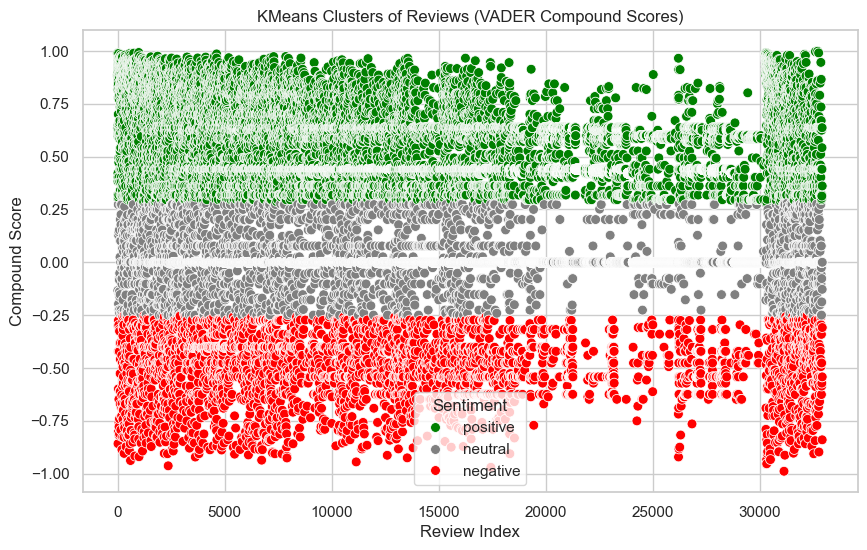

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot the clusters along the compound score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=range(len(df)), 
    y="compound", 
    hue="sentiment", 
    palette={"negative":"red", "neutral":"gray", "positive":"green"},
    data=df,
    s=50
)
plt.title("KMeans Clusters of Reviews (VADER Compound Scores)")
plt.xlabel("Review Index")
plt.ylabel("Compound Score")
plt.legend(title="Sentiment")
plt.show()


Top words in positive cluster: [('good', 4163), ('like', 2428), ('nice', 2215), ('better', 1625), ('great', 1194), ('account', 1040), ('best', 1003), ('love', 948), ('please', 892), ('people', 889)]
Top words in neutral cluster: [('account', 943), ('cant', 781), ('dont', 682), ('copy', 550), ('post', 507), ('see', 438), ('need', 433), ('use', 427), ('follow', 378), ('like', 358)]
Top words in negative cluster: [('bad', 580), ('account', 556), ('dont', 530), ('cant', 441), ('post', 377), ('like', 352), ('people', 324), ('worst', 324), ('see', 291), ('time', 279)]


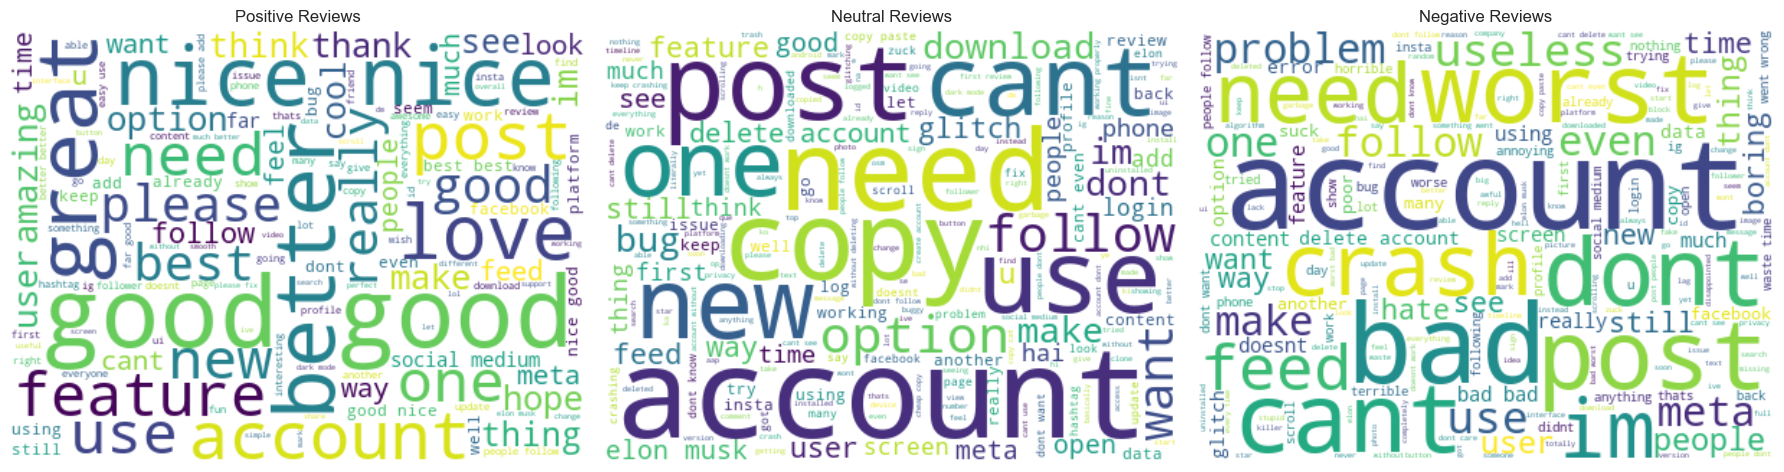

In [117]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to get top words
def get_top_words(text_series, n=10):
    words = " ".join(text_series).split()
    counter = Counter(words)
    return counter.most_common(n)

# Plot word clouds for each sentiment cluster
sentiments = df["sentiment"].unique()
plt.figure(figsize=(18,6))

for i, sentiment in enumerate(sentiments, 1):
    text = df[df["sentiment"] == sentiment]["review_cleaned"]
    
    # Generate word cloud
    wordcloud = WordCloud(width=400, height=300, background_color="white").generate(" ".join(text))
    
    # Plot
    plt.subplot(1, len(sentiments), i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{sentiment.capitalize()} Reviews")
    
    # Print top 10 words in console
    print(f"Top words in {sentiment} cluster:", get_top_words(text))

plt.tight_layout()
plt.show()


## Data Cleaning Pipeline 2 (for topic modelling) 

In [ ]:
# Data Cleaning 2
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phraser

negations = {"no", "not", "nor", "dont", "can't", "cannot", "never"}
stop_words = stop_words - negations

# App-specific words to remove
custom_stopwords_tm = set([
    "app", "apps", "application", "applications",
    "thread", "threads", "instagram", "twitter",
    "experience", "account", "meta", "facebook"
])

# ============================
#  Cleaning Function
# ============================
def clean_text_for_tm(text):
    text = str(text).lower()
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)  # keep only letters
    
    tokens = simple_preprocess(text, deacc=True)

    # remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if t not in custom_stopwords_tm]

    return tokens

# ============================
#  Bigram Builder
# ============================
def create_bigrams(texts):
    bigram = Phrases(texts, min_count=10, threshold=10)
    bigram_mod = Phraser(bigram)
    return [bigram_mod[doc] for doc in texts]

# ============================
# Prepare Dataset for Topic Modeling
# ============================
def prepare_tm_texts(df):
    docs = df["review_description"].apply(clean_text_for_tm).tolist()
    docs_bigrams = create_bigrams(docs)
    return docs_bigrams



## Topic Modelling 1 with sentiment labels (pos, neu, neg)

In [46]:
threads_pos = df[df["sentiment"] == "positive"]
threads_neu = df[df["sentiment"] == "neutral"]
threads_neg = df[df["sentiment"] == "negative"]


from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel


def train_lda_model(docs_bigrams, num_topics=5):

    dictionary = Dictionary(docs_bigrams)
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    corpus = [dictionary.doc2bow(doc) for doc in docs_bigrams]

    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        chunksize=2000,
        passes=10,
        alpha='auto'
    )

    coherence_model = CoherenceModel(
        model=lda_model,
        texts=docs_bigrams,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_score = coherence_model.get_coherence()

    return lda_model, corpus, dictionary, coherence_score



def run_lda(docs_df):
    docs_bigrams = prepare_tm_texts(docs_df)

    topic_range = range(3, 7)
    coherence_scores = {}

    for k in topic_range:
        lda_model, corpus, dictionary, coherence = train_lda_model(docs_bigrams, num_topics=k)
        coherence_scores[k] = coherence
        print(f"k={k} Coherence={coherence:.4f}")

    best_k = max(coherence_scores, key=coherence_scores.get)
    print("\nBest number of topics =", best_k)

    final_lda, corpus, dictionary, coherence = train_lda_model(docs_bigrams, num_topics=best_k)

    print("Final Coherence Score:", coherence)

    topics = final_lda.show_topics(num_topics=-1, num_words=15, formatted=False)

    for topic_id, words in topics:
        print(f"TOPIC {topic_id+1}:")
        top_terms = [w for w, weight in words]
        print(", ".join(top_terms))
        print()

    return final_lda    # ⭐ IMPORTANT FIX


print("\n===== THREADS POSITIVE TOPICS =====")
lda_pos = run_lda(threads_pos)

print("\n===== THREADS NEUTRAL TOPICS =====")
lda_neu = run_lda(threads_neu)

print("\n===== THREADS NEGATIVE TOPICS =====")
lda_neg = run_lda(threads_neg)



===== THREADS POSITIVE TOPICS =====
k=3 Coherence=0.5004
k=4 Coherence=0.5410
k=5 Coherence=0.5161
k=6 Coherence=0.5380

Best number of topics = 4
Final Coherence Score: 0.5410435356872372
TOPIC 1:
nice, love, best, super, wow, thanks, thank, zuck, elon_musk, mark, aap, fantastic, hai, superb, first_review

TOPIC 2:
great, please, ok, add, option, far, love, no, easy, make, please_add, delete, new, need, like

TOPIC 3:
good, better, amazing, like, cool, awesome, excellent, far, not, really, perfect, copy, lol, interesting, much_better

TOPIC 4:
like, not, see, people, no, would, posts, use, want, follow, also, feed, way, get, one


===== THREADS NEUTRAL TOPICS =====
k=3 Coherence=0.4809
k=4 Coherence=0.4705
k=5 Coherence=0.4895
k=6 Coherence=0.5094

Best number of topics = 6
Final Coherence Score: 0.5093692212878926
TOPIC 1:
hai, deleting, add, new, first_review, delete_without, mark, insta, badge, copied, install, op, nhi, go, bhi

TOPIC 2:
no, copy, not, like, let, needs, another, o

##### Not including this visulaization
Just added this as it looks cool and it is also very widely recommended for LDA but we can skip 

In [42]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.250602 -0.011104       1        1  32.183676
3      0.195242  0.094471       2        1  26.432173
6      0.188998 -0.085650       3        1  14.130969
5     -0.273339 -0.025504       4        1   8.162803
0     -0.125466  0.378606       5        1   7.396583
4     -0.133204 -0.163996       6        1   6.521955
1     -0.102833 -0.186823       7        1   5.171841, topic_info=            Term         Freq        Total Category  logprob  loglift
35          good  4032.000000  4032.000000  Default  30.0000  30.0000
74          nice  2348.000000  2348.000000  Default  29.0000  29.0000
236       better  1463.000000  1463.000000  Default  28.0000  28.0000
13          like  2403.000000  2403.000000  Default  27.0000  27.0000
9          great  1055.000000  1055.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1609     comment   123.650506   189.791681   Topic7  -4.1837   2.5335
226         post   165.603375   928.327979   Topic7  -3.8915   1.2382
2172          ko    69.180678   103.349569   Topic7  -4.7644   2.5605
1086  absolutely    68.361290   125.420046   Topic7  -4.7763   2.3551
510   every_time    66.163139   127.057124   Topic7  -4.8090   2.3094

[323 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2060      5  0.997268         aap
25        2  0.993942     ability
1086      1  0.119598  absolutely
1086      3  0.326901  absolutely
1086      7  0.542178  absolutely
...     ...       ...         ...
2189      4  0.994057          ye
1333      3  0.986056       years
351       2  0.218130         yet
351       3  0.776755         yet
750       4  0.997326        zuck

[405 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 7, 6, 1, 5, 2])

### Visulaizing the Topics in pos, neu, neg (LDA)


--- VISUALIZING LDA TOPICS: POSITIVE ---


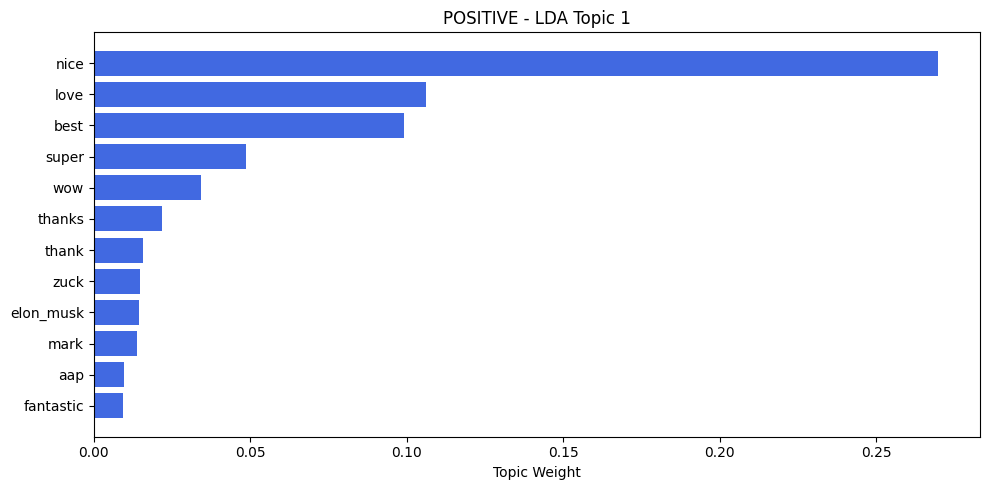

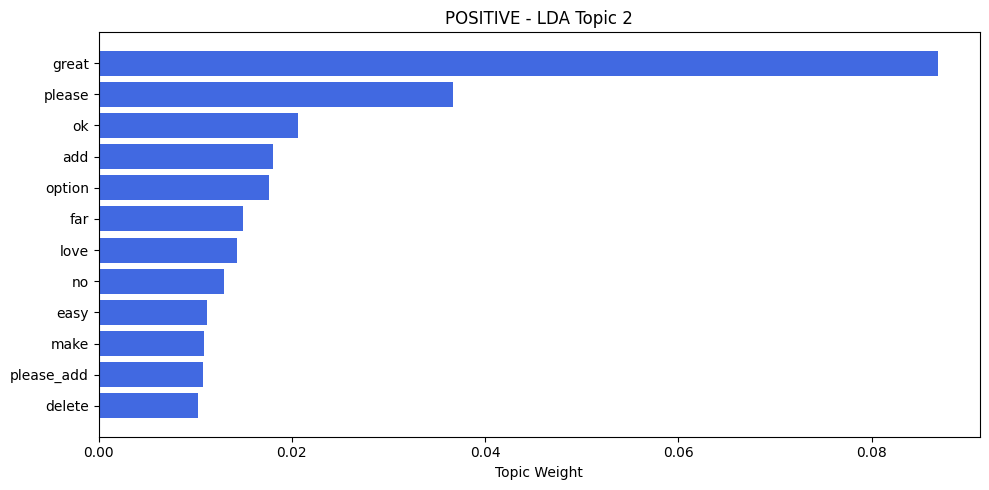

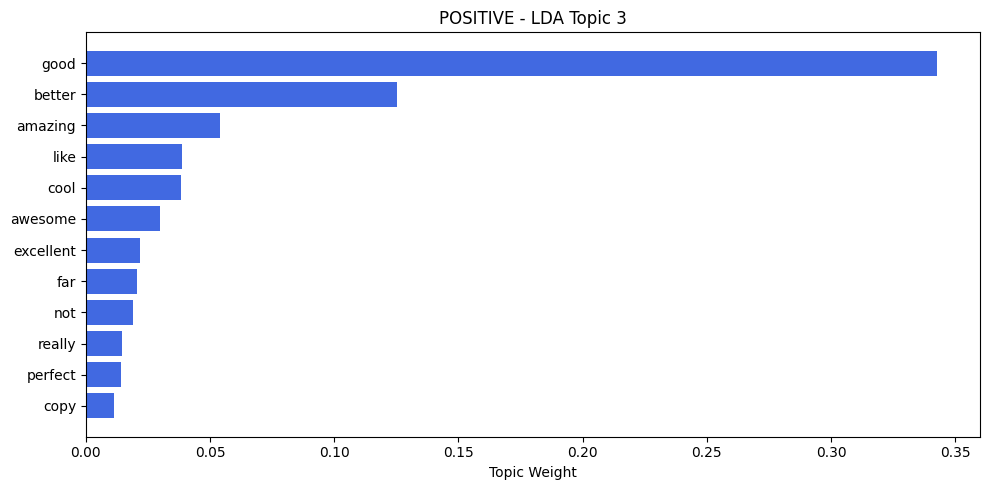

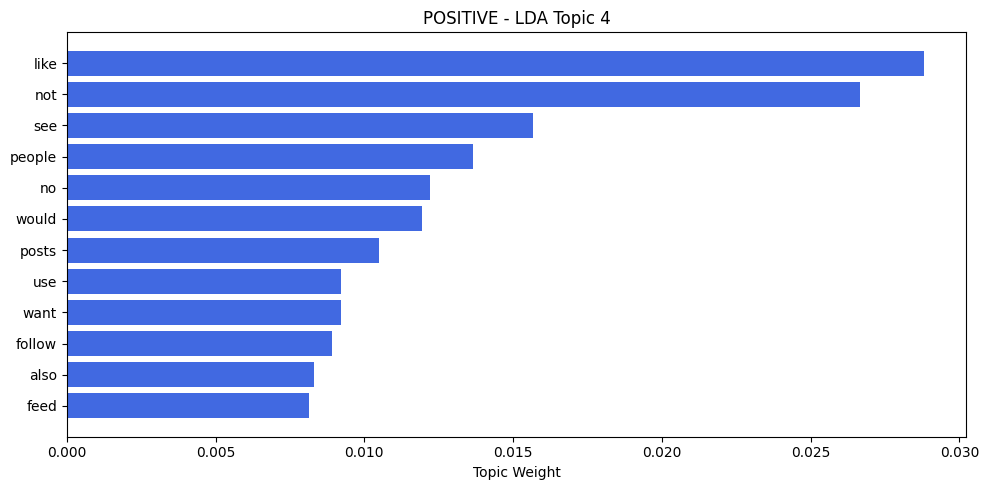


--- VISUALIZING LDA TOPICS: NEUTRAL ---


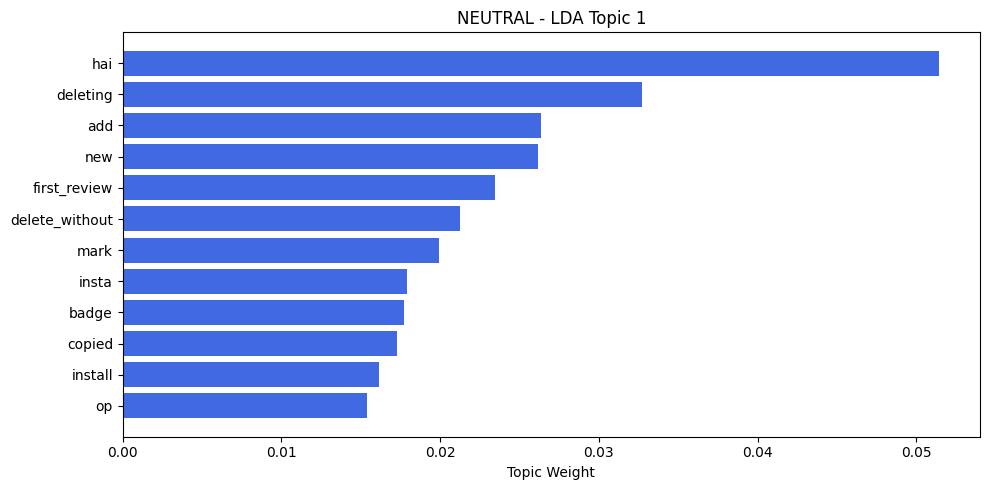

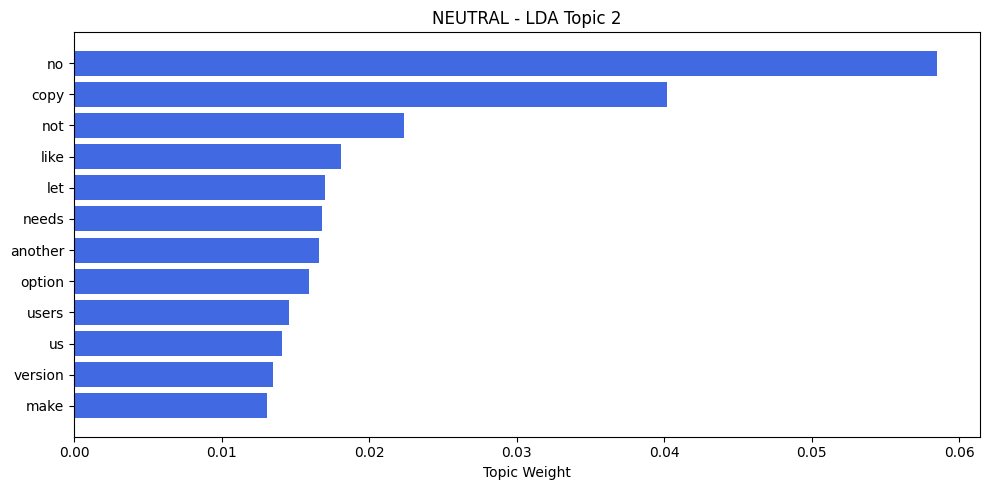

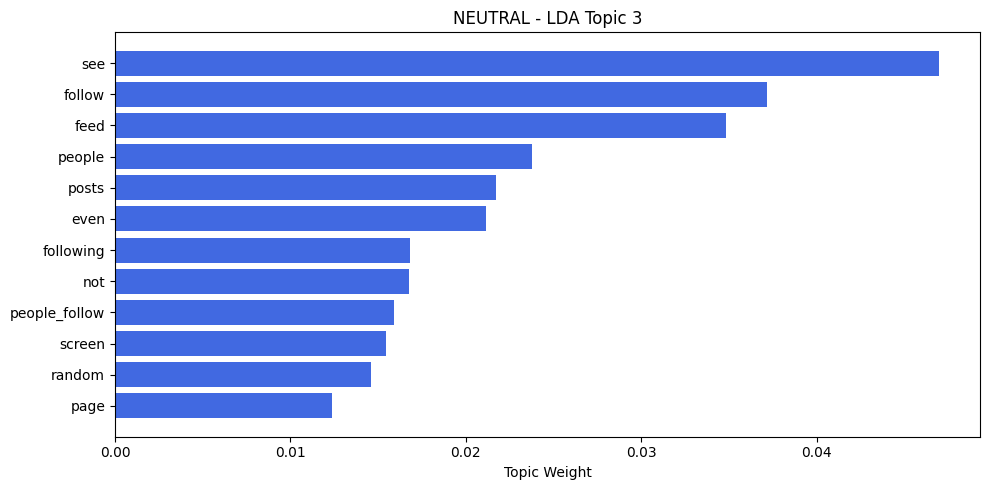

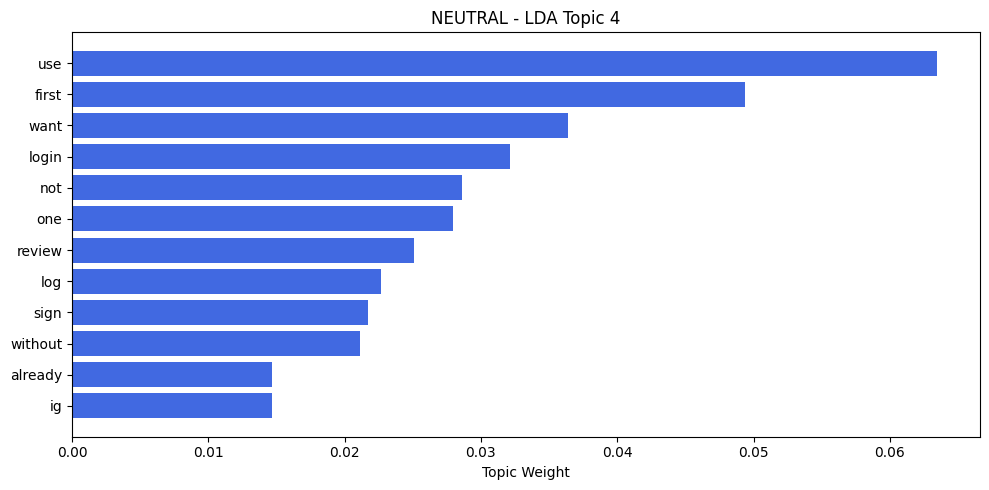

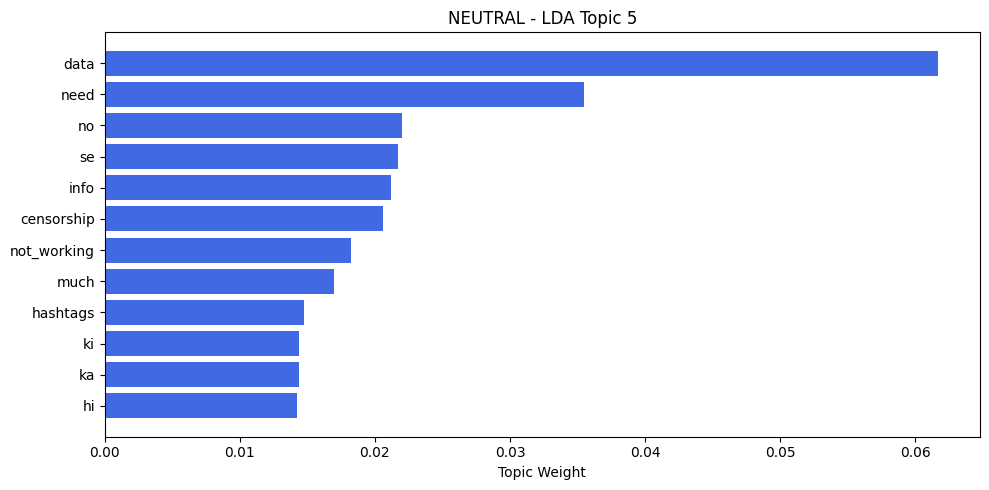

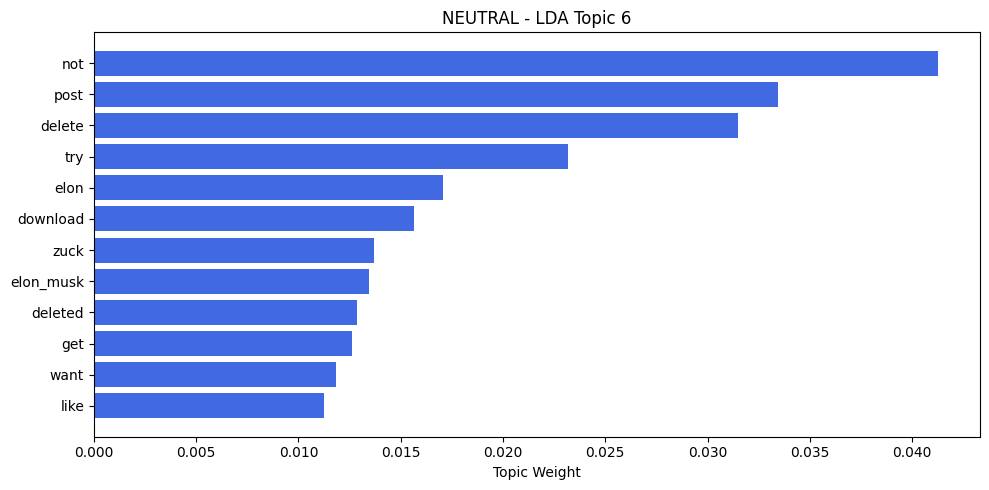


--- VISUALIZING LDA TOPICS: NEGATIVE ---


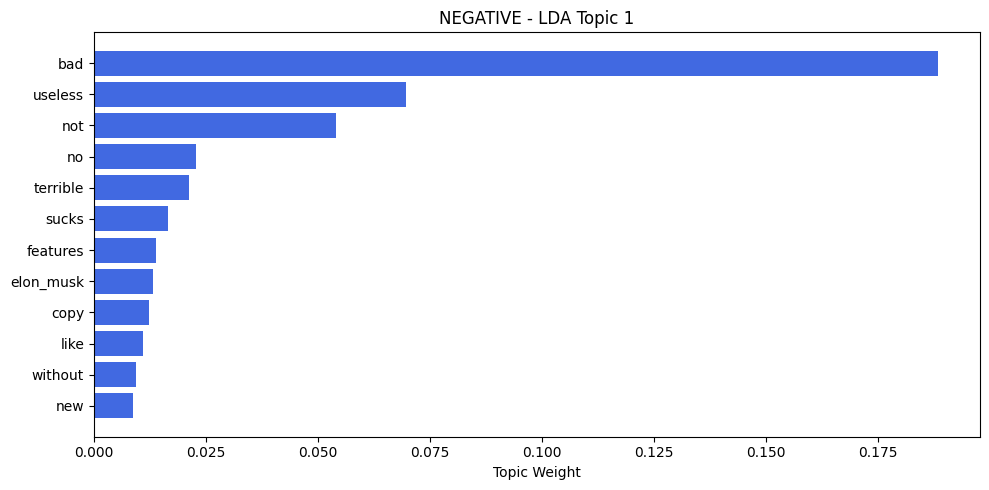

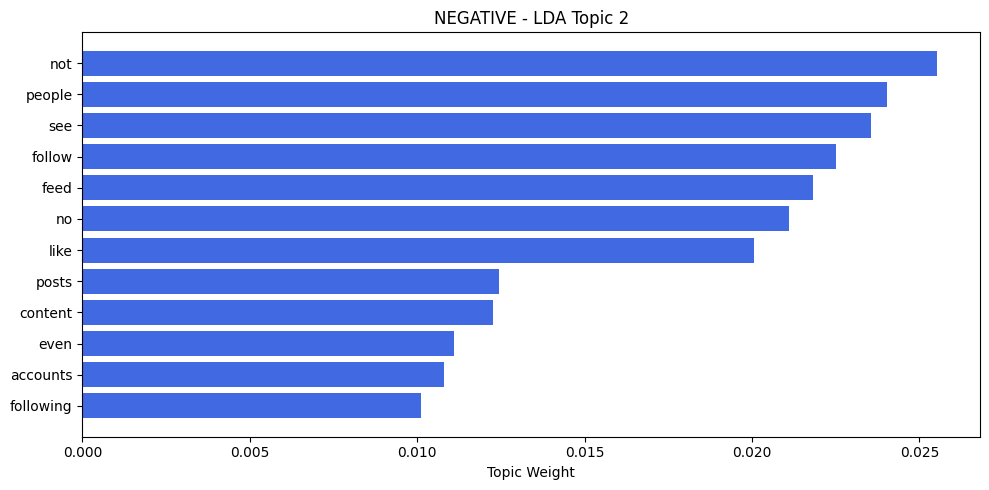

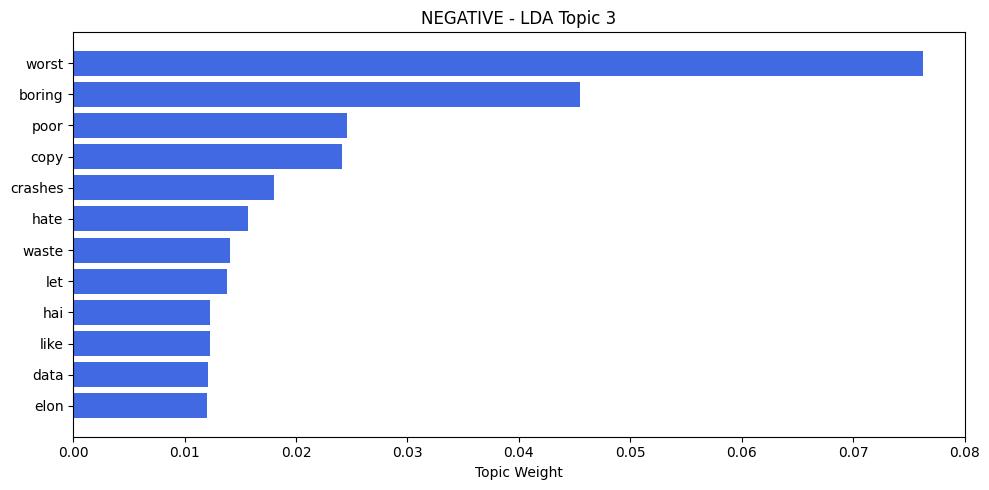

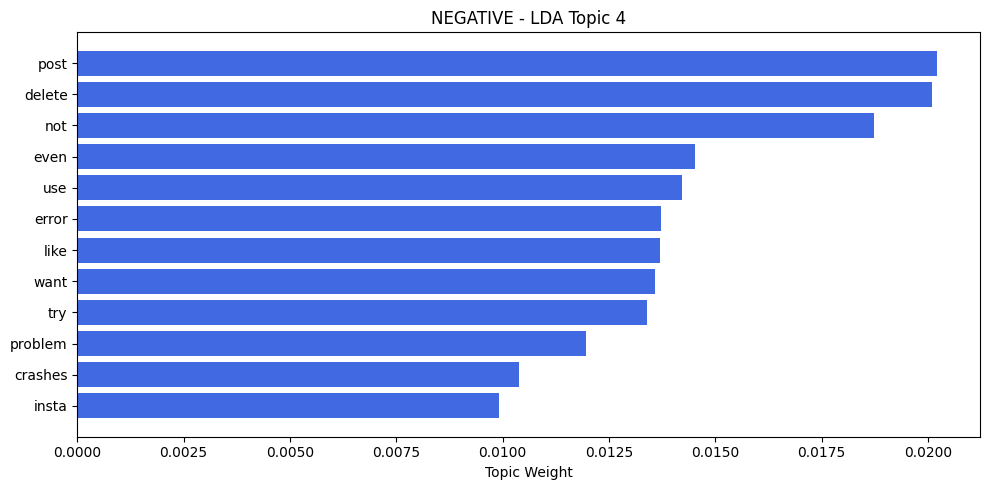

In [47]:
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Visualization helper
# ---------------------------------------------------------
def plot_lda_topic(words, weights, title):
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], weights[::-1], color='royalblue')
    plt.title(title)
    plt.xlabel("Topic Weight")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# Function to visualize topics for a trained LDA model
# ---------------------------------------------------------
def visualize_lda_topics(lda_model, sentiment_label, num_words=12):
    print(f"\n--- VISUALIZING LDA TOPICS: {sentiment_label.upper()} ---")

    topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)

    for topic_id, topic in topics:
        words = [w for w, wt in topic]
        weights = [wt for w, wt in topic]

        title = f"{sentiment_label.upper()} - LDA Topic {topic_id+1}"
        plot_lda_topic(words, weights, title)

# ---------------------------------------------------------
# Call this after you finish training lda_pos, lda_neu, lda_neg
# ---------------------------------------------------------

visualize_lda_topics(lda_pos, "Positive")
visualize_lda_topics(lda_neu, "Neutral")
visualize_lda_topics(lda_neg, "Negative")





## Topic Modelling 2 NMF (using sentiment - pos, neu, neg)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

def run_nmf(docs_df):
    docs_bigrams = prepare_tm_texts(docs_df)
    docs_text = [" ".join(doc) for doc in docs_bigrams]

    tfidf_vectorizer = TfidfVectorizer(
        max_df=0.95,
        min_df=10,
        ngram_range=(1, 1),
    )

    tfidf = tfidf_vectorizer.fit_transform(docs_text)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    dictionary = Dictionary(docs_bigrams)
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    topic_range = range(3, 10)
    coherence_scores = {}

    for k in topic_range:
        nmf_model = NMF(
            n_components=k,
            random_state=42,
            init="nndsvda",
            max_iter=400
        )
        
        W = nmf_model.fit_transform(tfidf)
        H = nmf_model.components_

        top_words = []
        for topic in H:
            idxs = topic.argsort()[-20:]
            top_words.append([feature_names[i] for i in idxs])

        coherence_model = CoherenceModel(
            topics=top_words,
            texts=docs_bigrams,
            dictionary=dictionary,
            coherence='c_v'
        )

        coherence = coherence_model.get_coherence()
        coherence_scores[k] = coherence
        print(f"k={k} Coherence={coherence:.4f}")

    best_k = max(coherence_scores, key=coherence_scores.get)
    print("\nBest number of NMF topics =", best_k)

    final_nmf = NMF(
        n_components=best_k,
        random_state=42,
        init="nndsvda",
        max_iter=400
    )

    W_final = final_nmf.fit_transform(tfidf)
    H_final = final_nmf.components_

    print("\n--- FINAL NMF TOPIC WORDS ---\n")
    for idx, topic in enumerate(H_final):
        indices = topic.argsort()[-15:]
        words = [feature_names[i] for i in indices]
        print(f"TOPIC {idx+1}: {', '.join(words)}")

    return final_nmf, feature_names



print("\n===== NMF THREADS POSITIVE =====")
nmf_pos, pos_feats = run_nmf(threads_pos)

print("\n===== NMF THREADS NEUTRAL =====")
nmf_neu, neu_feats = run_nmf(threads_neu)

print("\n===== NMF THREADS NEGATIVE =====")
nmf_neg, neg_feats = run_nmf(threads_neg)




===== NMF THREADS POSITIVE =====
k=3 Coherence=0.4601
k=4 Coherence=0.5053
k=5 Coherence=0.5075
k=6 Coherence=0.5032
k=7 Coherence=0.4951
k=8 Coherence=0.4686
k=9 Coherence=0.4636

Best number of NMF topics = 5

--- FINAL NMF TOPIC WORDS ---

TOPIC 1: need, love, new, features, pretty, think, use, aap, job, really, like, one, far, not, good
TOPIC 2: interface, download, see, ui, platform, features, love, new, work, really, one, wow, like, aap, nice
TOPIC 3: tweeter, could, would, no, elon, elon_musk, still, think, amazing, love, not, like, way, far, better
TOPIC 4: new, social, features, amazing, use, far, world, aap, platform, not, like, social_media, love, one, best
TOPIC 5: think, job, one, start, would, features, alternative, new, really, not, far, like, amazing, love, great

===== NMF THREADS NEUTRAL =====
k=3 Coherence=0.4958
k=4 Coherence=0.4731
k=5 Coherence=0.4858
k=6 Coherence=0.4800
k=7 Coherence=0.4856
k=8 Coherence=0.4956
k=9 Coherence=0.4931

Best number of NMF topics = 

### Visulaizing the Topics in pos, neu, neg (NMF)


--- VISUALIZING NMF TOPICS: POSITIVE ---


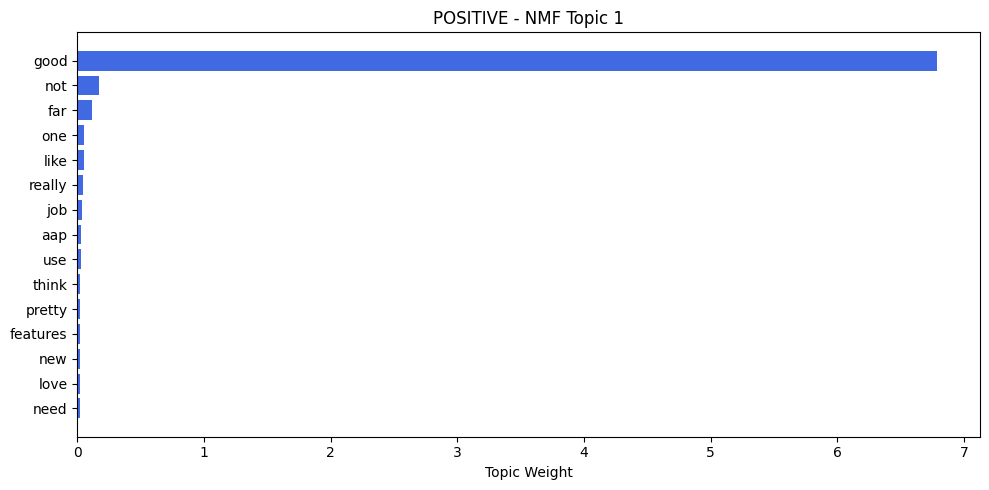

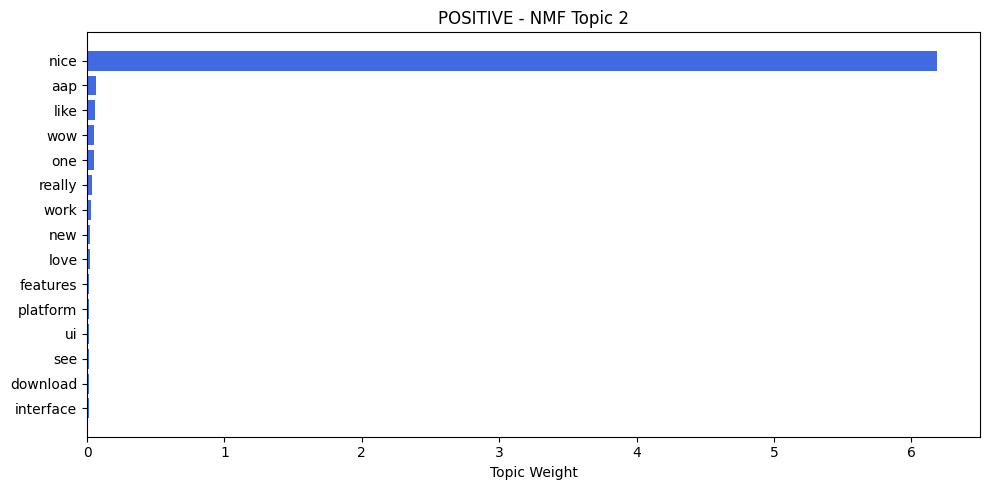

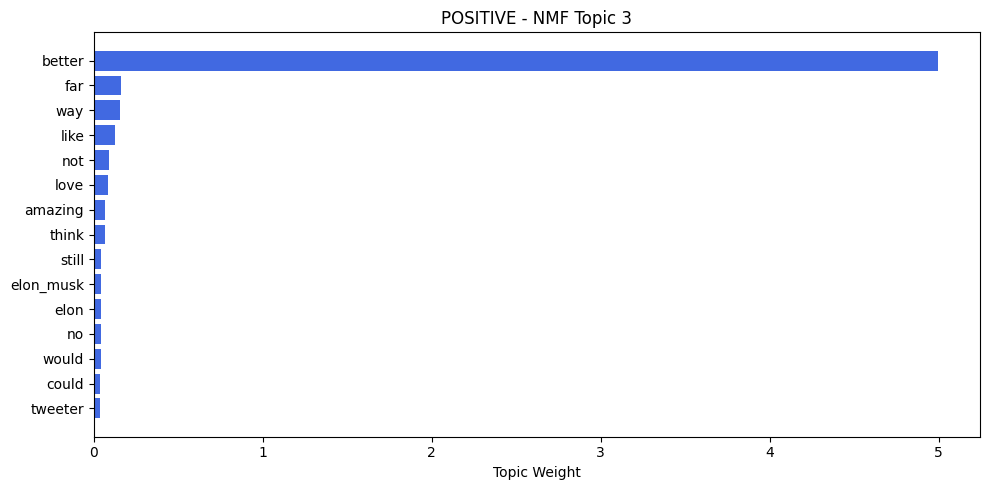

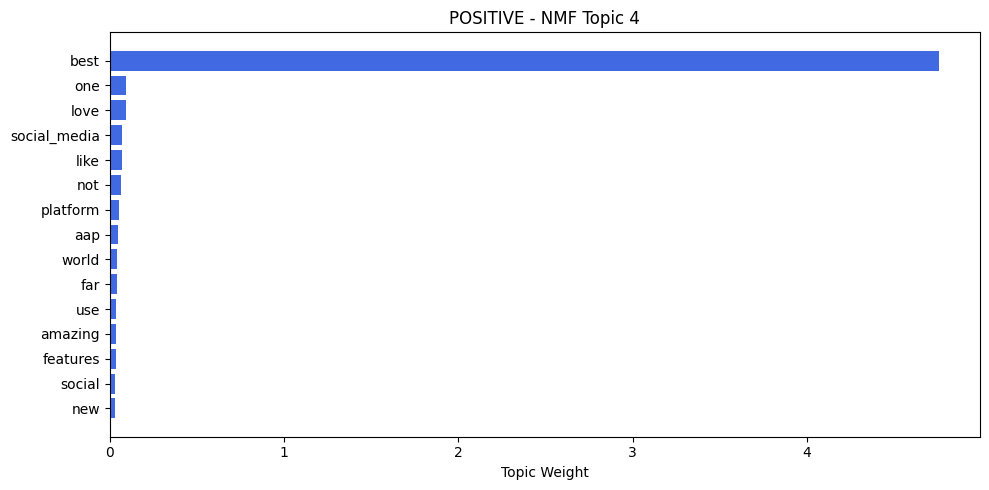

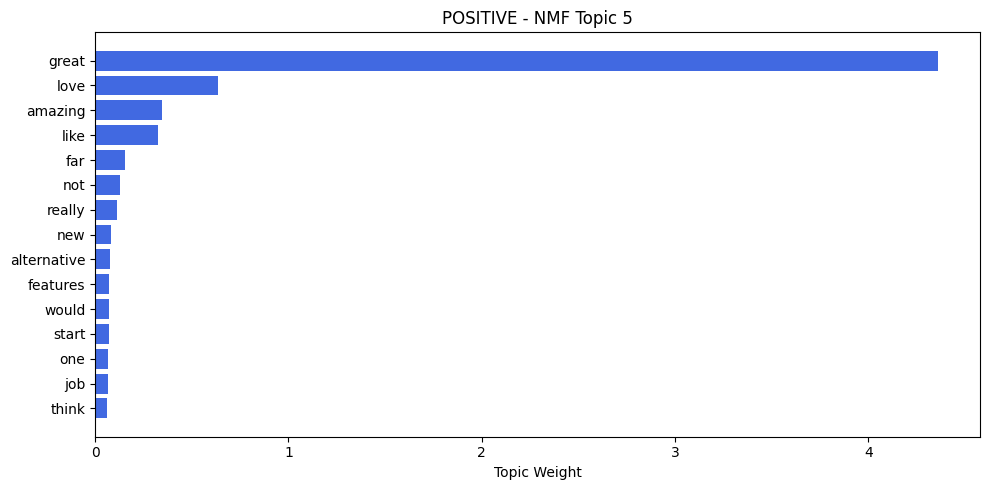


--- VISUALIZING NMF TOPICS: NEUTRAL ---


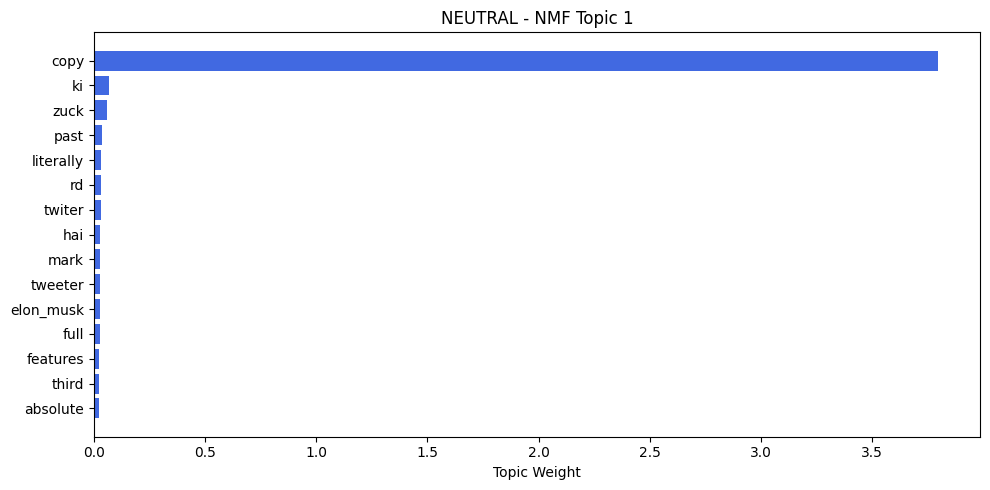

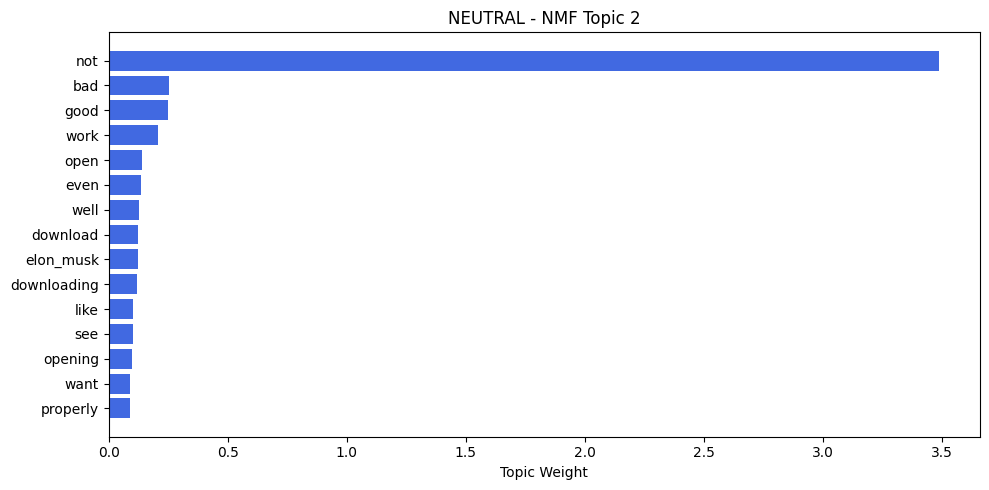

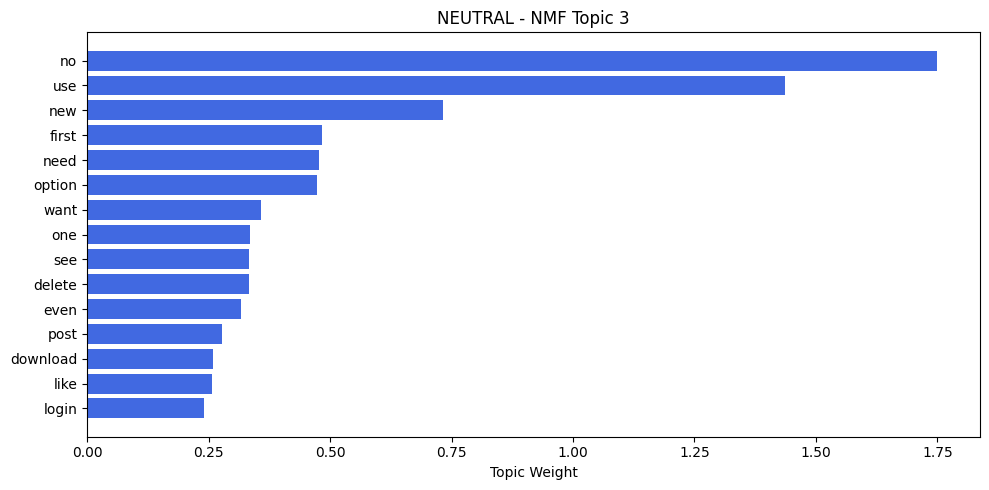


--- VISUALIZING NMF TOPICS: NEGATIVE ---


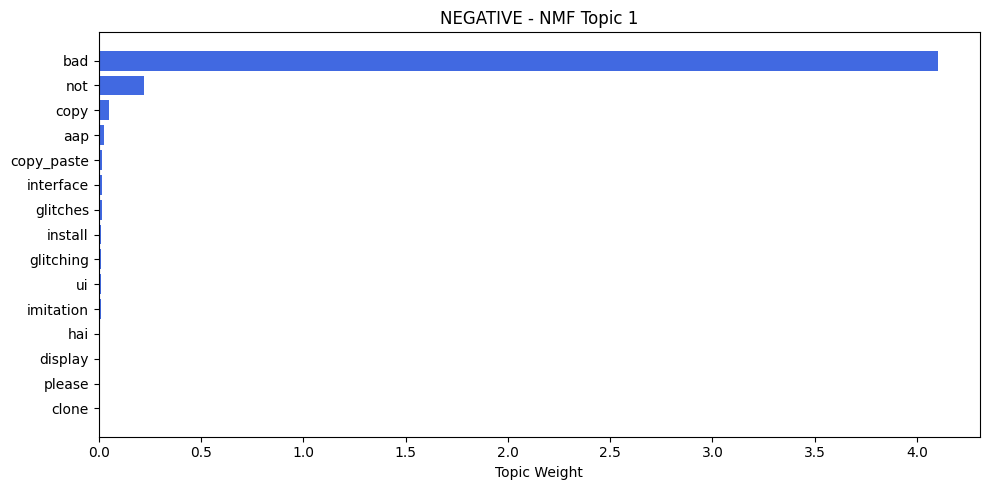

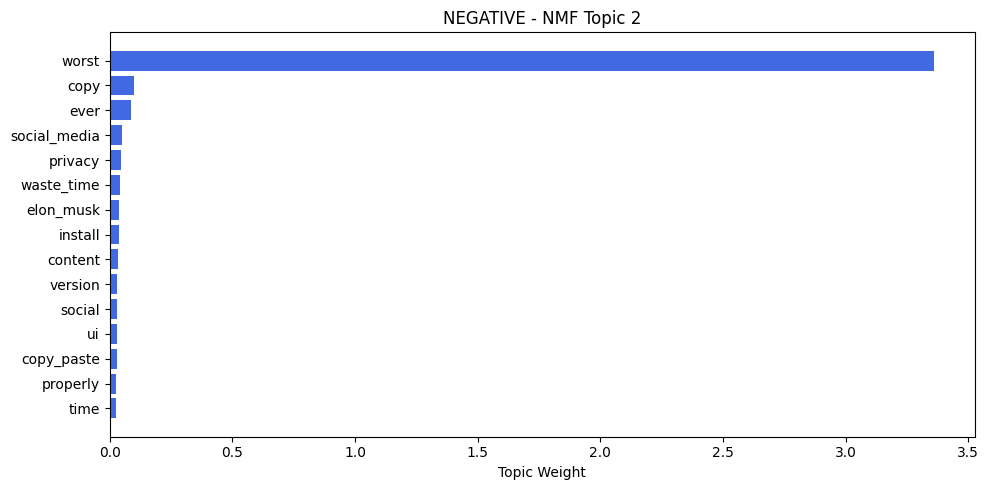

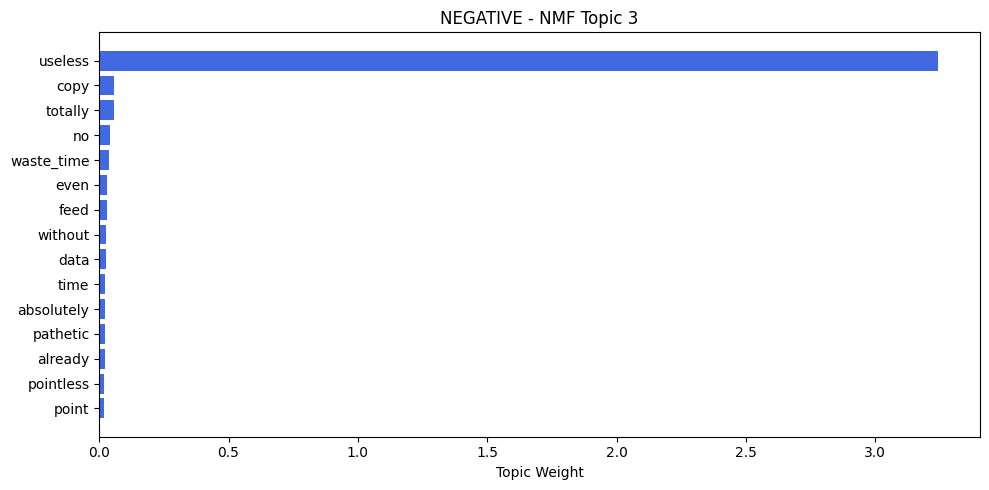

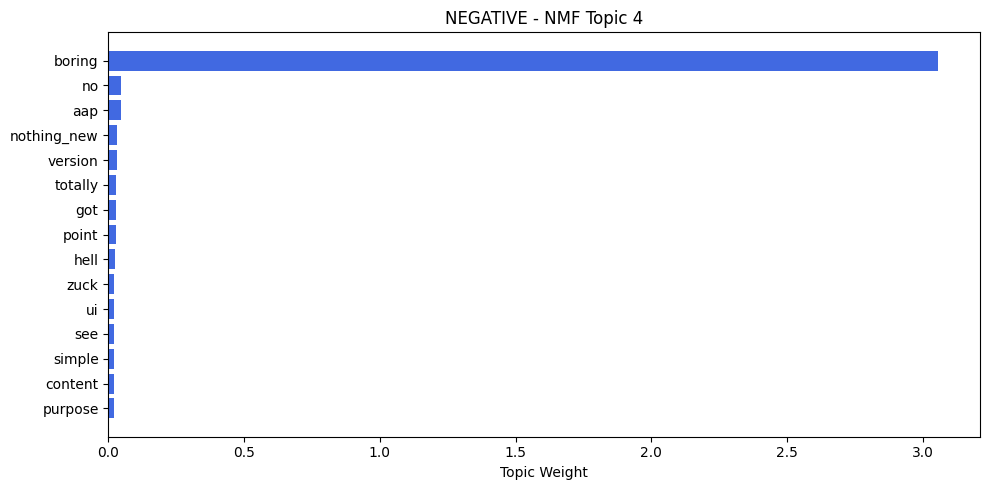

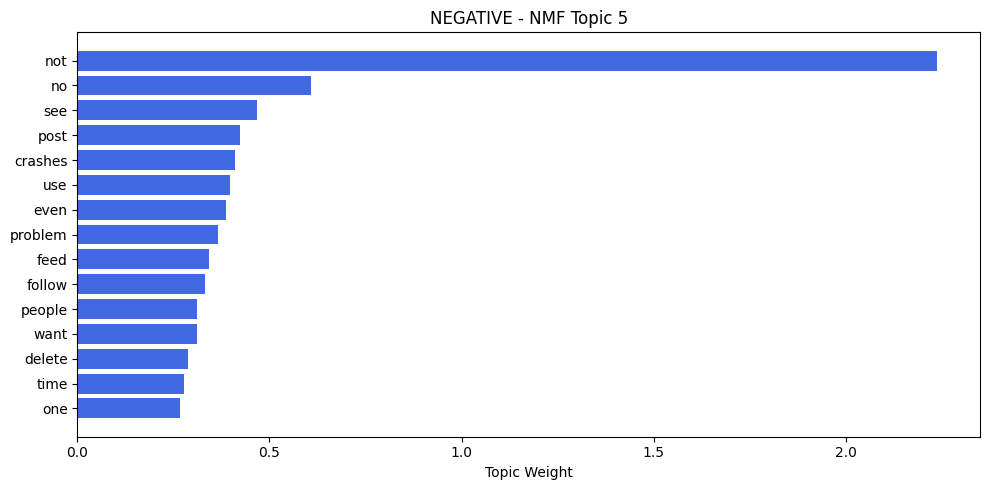

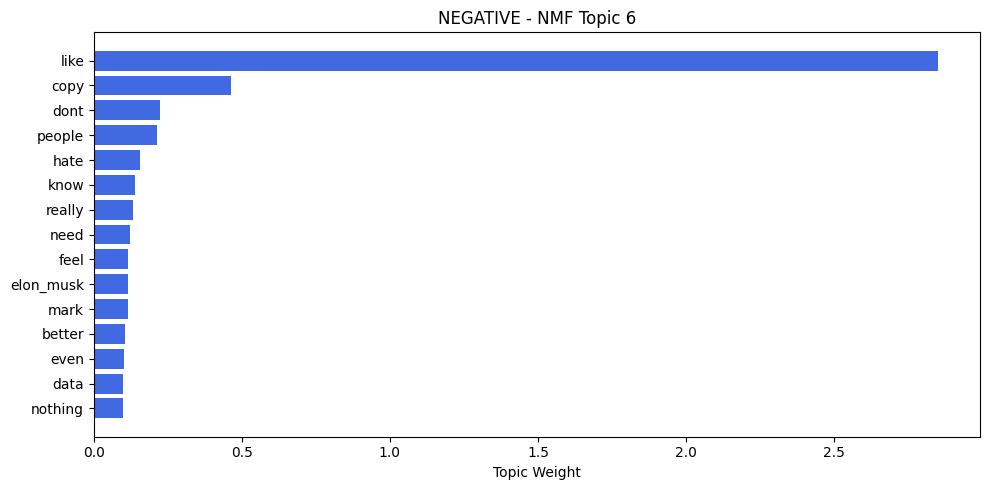

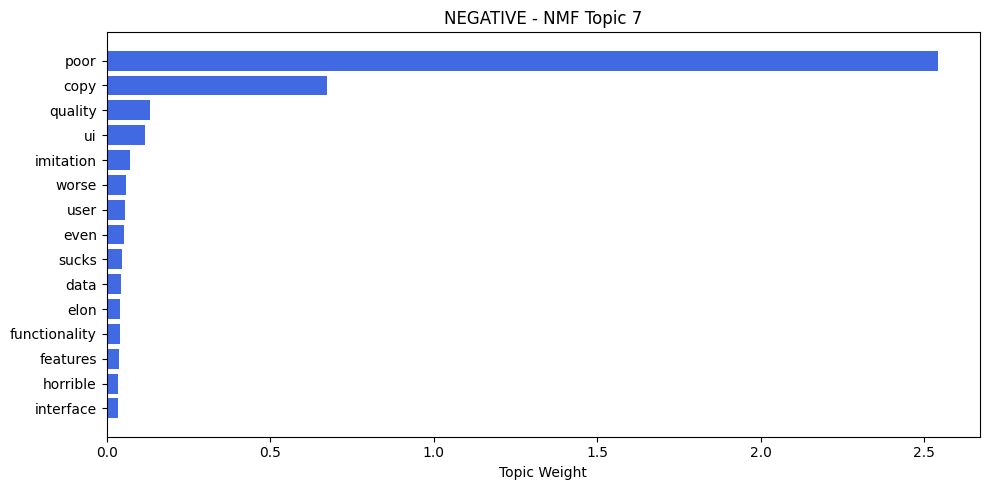

In [52]:
import matplotlib.pyplot as plt

def plot_topic(words, weights, title):
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], weights[::-1], color='royalblue')
    plt.title(title)
    plt.xlabel("Topic Weight")
    plt.tight_layout()
    plt.show()

def visualize_nmf_topics(nmf_model, feature_names, sentiment_label):
    print(f"\n--- VISUALIZING NMF TOPICS: {sentiment_label.upper()} ---")
    
    H = nmf_model.components_

    for idx, topic in enumerate(H):
        top_idx = topic.argsort()[-15:][::-1]
        words = [feature_names[i] for i in top_idx]
        weights = [topic[i] for i in top_idx]

        title = f"{sentiment_label.upper()} - NMF Topic {idx+1}"
        plot_topic(words, weights, title)


visualize_nmf_topics(nmf_pos, pos_feats, "Positive")
visualize_nmf_topics(nmf_neu, neu_feats, "Neutral")
visualize_nmf_topics(nmf_neg, neg_feats, "Negative")


## BERTopic 

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment splits
positive_df = df[df["sentiment_label"] == "positive"].copy()
neutral_df  = df[df["sentiment_label"] == "neutral"].copy()
negative_df = df[df["sentiment_label"] == "negative"].copy()

positive_texts = positive_df["review_cleaned"].tolist()
neutral_texts  = neutral_df["review_cleaned"].tolist()
negative_texts = negative_df["review_cleaned"].tolist()

print("Counts:", len(positive_texts), len(neutral_texts), len(negative_texts))

# Embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

def run_bertopic(texts, min_topic_size=20):
    embeddings = embedding_model.encode(texts, show_progress_bar=True)
    model = BERTopic(
        language="english",
        umap_model=None,
        min_topic_size=min_topic_size,
        top_n_words=15,
        calculate_probabilities=True,
        verbose=True
    )
    topics, probs = model.fit_transform(texts, embeddings)
    return model, topics, probs, embeddings


positive_df["topic5"] = pos_topics5
neutral_df["topic5"]  = neu_topics5
negative_df["topic5"] = neg_topics5


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pos_model, pos_topics, pos_probs, pos_emb = run_bertopic(positive_texts)
neu_model, neu_topics, neu_probs, neu_emb = run_bertopic(neutral_texts)
neg_model, neg_topics, neg_probs, neg_emb = run_bertopic(negative_texts)

def reduce_to_5(model, texts, embeddings):
    reduced_model = model.reduce_topics(texts, nr_topics=5)
    new_topics, new_probs = reduced_model.transform(texts, embeddings)
    return reduced_model, new_topics, new_probs

pos_model5, pos_topics5, pos_probs5 = reduce_to_5(pos_model, positive_texts, pos_emb)
neu_model5, neu_topics5, neu_probs5 = reduce_to_5(neu_model, neutral_texts, neu_emb)
neg_model5, neg_topics5, neg_probs5 = reduce_to_5(neg_model, negative_texts, neg_emb)


In [ ]:
import matplotlib.pyplot as plt

def plot_topic(words, weights, title):
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], weights[::-1], color="royalblue")
    plt.title(title)
    plt.xlabel("Topic Weight")
    plt.tight_layout()
    plt.show()


In [ ]:
def inspect_topics(model, df_sent, group_name):
    print("\n" + "="*80)
    print(f"===== BERTOPIC SUMMARY ({group_name.upper()}) — 5 TOPICS =====")
    print("="*80)

    topic_info = model.get_topic_info()
    print(topic_info)

    # Top words per topic
    print(f"\n--- TOP WORDS ({group_name}) ---")
    for tid in topic_info["Topic"]:
        if tid == -1:
            continue
        print(f"\nTopic {tid}:")
        print(model.get_topic(tid))

    # Topic distribution barplot
    plt.figure(figsize=(8,4))
    sns.barplot(x="Topic", y="Count", data=topic_info[topic_info["Topic"] != -1])
    plt.title(f"Topic Distribution ({group_name.capitalize()} Reviews)")
    plt.tight_layout()
    plt.show()

    # NEW: Topic word-bar visualizations (like LDA/NMF)
    for tid in topic_info["Topic"]:
        if tid == -1:
            continue

        words_scores = model.get_topic(tid)
        words = [w for (w, score) in words_scores]
        weights = [score for (w, score) in words_scores]

        plot_topic(words, weights, title=f"{group_name.upper()} - BERTopic {tid}")

    # Representative docs (BERTopic v0.16+)
    print(f"\n--- REPRESENTATIVE EXAMPLES ({group_name}) ---")
    repr_docs = model.get_representative_docs()
    for tid, docs in repr_docs.items():
        if tid == -1:
            continue
        print(f"\nTopic {tid} Examples:")
        for d in docs[:3]:
            print("-", d[:200], "...")


In [ ]:
inspect_topics(pos_model5, positive_df, "positive")
inspect_topics(neu_model5, neutral_df, "neutral")
inspect_topics(neg_model5, negative_df, "negative")
